# Predict Customer Churn in Banks

## Data import  

In [1]:
#Importing necessary libraries
import numpy as np # Math functions
import pandas as pd # data importing and data processing
import matplotlib.pyplot as plt # For plotting
# Allan Downey says its the magic statement. Below command puts plots in-line with notebook code.
%matplotlib inline 

In [2]:
#Reading input file and importing it using pandas
input_file = "Churn_Modelling.csv"
bank_df = pd.read_csv(input_file)

In [3]:
#Check if the data is imported correctly
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Dimensions of the dataset
bank_df.shape

(10000, 14)

In [5]:
# Get a glimpse of the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From the above output, its clear that there are no NULL values in the dataset. So we don't need to handle it seperately.

## Distributions

### Descriptive Statistics

In [157]:
# Summary of the dataset. It gives the visibility into each variable's range
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The above table shows the Mean, Standard deviation, Min/Max, 25%, 50%, 75% and Max values. 

In [117]:
# Median values
bank_df.median()

RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

Histograms can explain the distribution and range of variables visually.

### Histograms

In [43]:
# Importing thinkstats and thinkplot modules for easy stats and visulaization
import thinkstats2
import thinkplot

#### Age Variable

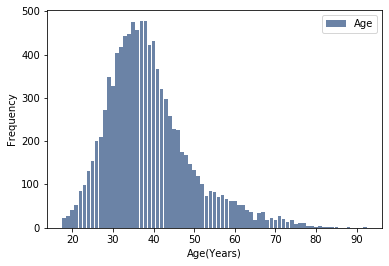

<Figure size 576x432 with 0 Axes>

In [22]:
# Histogram for age variable
hist_age = thinkstats2.Hist(bank_df.Age, label='Age')
thinkplot.Hist(hist_age)
thinkplot.Show(xlabel='Age(Years)', ylabel='Frequency')


#### CreditScore Variable

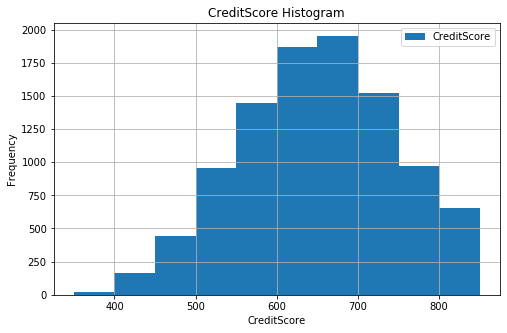

In [60]:
bank_df.CreditScore.hist(bins=10, figsize=(8,5), label="CreditScore")
plt.title("CreditScore Histogram")
plt.xlabel("CreditScore")
plt.ylabel("Frequency")
plt.legend()
plt.show()


#### Balance Variable

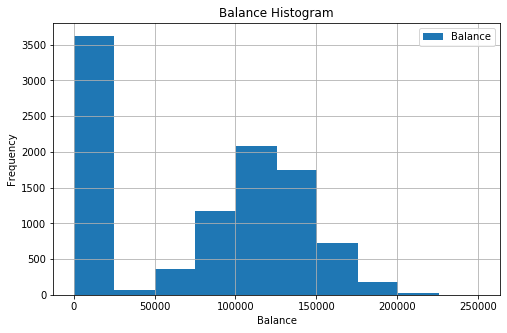

In [59]:

bank_df.Balance.hist(bins=10, figsize=(8,5), label = "Balance")
plt.title("Balance Histogram")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Estimated Salary Variable

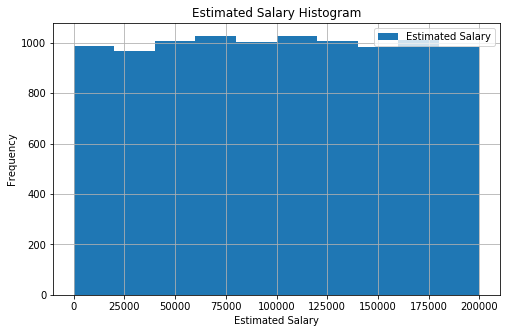

In [61]:

bank_df.EstimatedSalary.hist(bins=10, figsize=(8,5), label = "Estimated Salary")
plt.title("Estimated Salary Histogram")
plt.xlabel("Estimated Salary")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Number of Products Variable

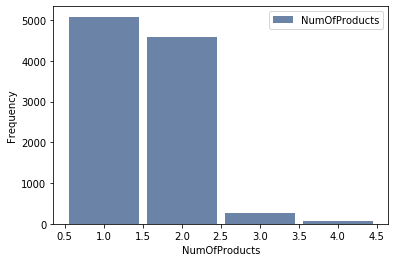

<Figure size 576x432 with 0 Axes>

In [32]:
hist_NumOfProducts = thinkstats2.Hist(bank_df.NumOfProducts, label='NumOfProducts')
thinkplot.Hist(hist_NumOfProducts)
thinkplot.Show(xlabel='NumOfProducts', ylabel='Frequency')


### PMF 

#### Customers with Two/More products and Age Histogram

PMF for Customers with Number of Products less than or equal to 2 and More than 2.

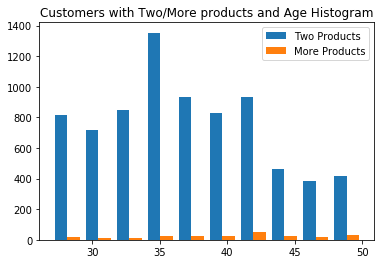

In [109]:
two_products = bank_df[bank_df.NumOfProducts <= 2]
more_products = bank_df[bank_df.NumOfProducts >2 ]
fig, ax = plt.subplots()
ax.hist([two_products.Age, more_products.Age], 10, (27, 50), histtype="bar", label=("Two Products", "More Products"))
ax.set_title("Customers with Two/More products and Age Histogram")
ax.legend()
plt.show()

From the above histogram, its clear that there are more customers with one/two products than more products. Interestingly, customers between 40-45 Age has more products than other age group.

#### Customer's Gender and Age Histogram

I also want to look at Female/Male distribution in the dataset with relative to their Age.

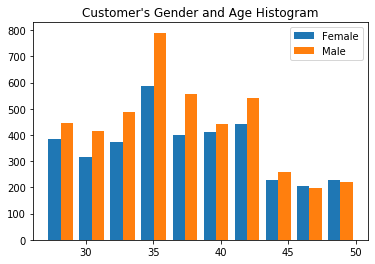

In [110]:
Female = bank_df[bank_df.Gender == 'Female']
Male = bank_df[bank_df.Gender == 'Male']
fig, ax = plt.subplots()
ax.hist([Female.Age, Male.Age], 10, (27, 50), histtype="bar", label=("Female", "Male"))
ax.set_title("Customer's Gender and Age Histogram")
ax.legend()
plt.show()

From the above histogram, we can infer that there are more Male customers than Female customers across Age groups except >45 Age groups.

#### Customer's Exit status and Age Histogram

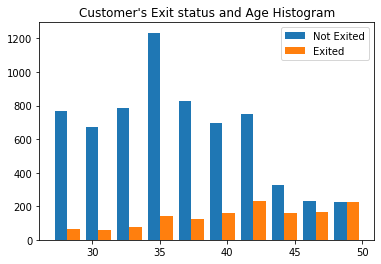

In [130]:
Not_Exited = bank_df[bank_df.Exited == 0]
Exited = bank_df[bank_df.Exited == 1]
fig, ax = plt.subplots()
ax.hist([Not_Exited.Age, Exited.Age], 10, (27, 50), histtype="bar", label=("Not Exited", "Exited"))
ax.set_title("Customer's Exit status and Age Histogram")
ax.legend()
plt.show()

From the above histogram, we can infer that customer churn is increasing with Age.

## CDF 

### CDF for Age variable

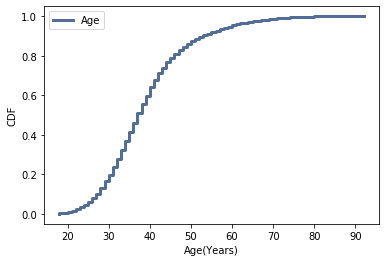

<Figure size 576x432 with 0 Axes>

In [131]:
# CDF for Age variable
cdf = thinkstats2.Cdf(bank_df.Age, label='Age')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Age(Years)', ylabel='CDF')
plt.show()

From the above CDF plot, I can see the Median age (at CDF=0.5) is 37-38 years.

## Analytic Distribution

Like its said in the book, many quantities in natural world are well modeled by Normal distribution.

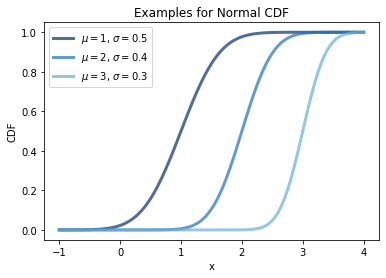

In [149]:
# Examples of Normal CDF for different Mean and Sigmas
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Examples for Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

I'll use Normal distribution to explain the **Age** of Customers in the bank dataset.

### Model Vs Actual CDF curve for Age variable

Mean, Var 38.896392785571145 107.60289279962721
Sigma 10.373181421320425


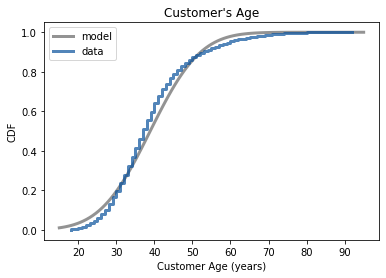

In [154]:
# estimate parameters: trimming outliers yields a better fit
# I'm trimming 0.1% data to avoid outliers influencing my analysis
mu, var = thinkstats2.TrimmedMeanVar(bank_df.Age, p=0.001)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=15, high=95)

thinkplot.Plot(xs, ps, label='model', color='0.4')

# plot the data
cdf = thinkstats2.Cdf(bank_df.Age, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Customer\'s Age',
                 xlabel='Customer Age (years)',
                 ylabel='CDF')

From the above plot, its clear that Age is a pretty good fit. Although there is a slight variation in the data compared to model, the model explains the data very well.

### Normal Probability Plot for Age variable

Let's plot Normal probability plot. 
The idea here is if Age variable is normally distributed then it forms a straight line on Normal probability plot.

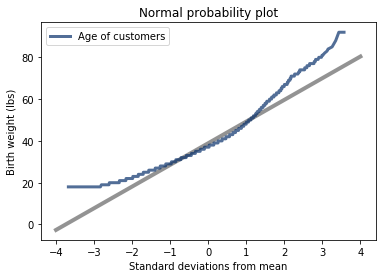

In [145]:
#Normal probability plot
mean, var = thinkstats2.TrimmedMeanVar(bank_df.Age, p=0.001)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.4')

xs, ys = thinkstats2.NormalProbability(bank_df.Age)
thinkplot.Plot(xs, ys, label='Age of customers')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

From the above plot, we can see that Age variable slightly deviates from the model at the start and towards end. That means Age is normally distributed for the most part except for young and older customers. Overall, the model explains the Age data well.

## Relationship between Variables

### Scatter Plots

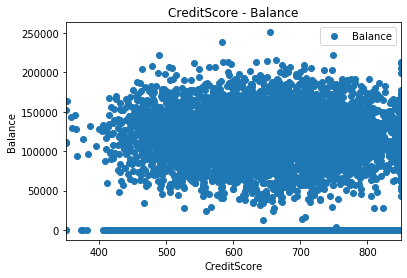

In [64]:
# Scatter plot between Credit Score and Balance
bank_df.plot(x='CreditScore', y='Balance', style='o')  
plt.title('CreditScore - Balance')  
plt.xlabel('CreditScore')  
plt.ylabel('Balance')  
plt.show() 

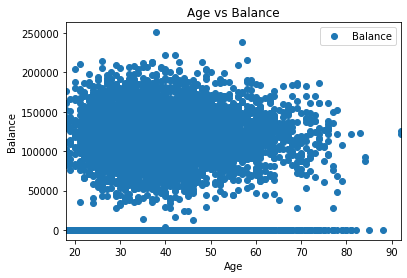

In [66]:
# Scatter plot between Age and Balance
bank_df.plot(x='Age', y='Balance', style='o')  
plt.title('Age vs Balance')  
plt.xlabel('Age')  
plt.ylabel('Balance')  
plt.show() 

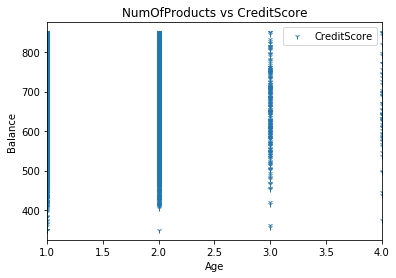

In [165]:
# Scatter plot between Balance and Number of Products
bank_df.plot(x='NumOfProducts', y='CreditScore', style='1')  
plt.title('NumOfProducts vs CreditScore')  
plt.xlabel('Age')  
plt.ylabel('Balance')  
plt.show() 

### Covariance and Correlation

#### Covariance

In [170]:
# Function to calculate Covariance
# This function uses numpy's dot function
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [171]:
# Covariance between Age and Customer Exit status
Cov(bank_df.Age, bank_df.Exited)

1.20512934

In [169]:
# Covariance between Balance and Customer Exit status
Cov(bank_df.Balance, bank_df.Exited)

2978.6338150344

Covariance can only tell if the two variables are positvely related or negatively related but it doesn't give the strength of the relationship. That's why we need to calculate the Correlation.

#### Pearson Correlation

In [172]:
# Pearson Correlation of all vaiables
bank_df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


Let's draw heat map for easier visualization of the correlation.

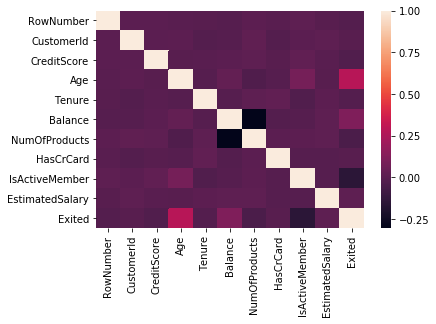

In [63]:
# Impoting seaborn for heatmap chart
import seaborn as sns
corr = bank_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

From the above heatmap, its clear Age variable has good correlation with Exited target variable compared to other dependent variables. Balance seems to be the next dependent variable which is slightly correlated.
Also note, Correlation only talks about linear relationships among variables. If the variables are non-linearly related then corr() doesn't show that relationship.

#### Spearman's correlation

Spearman's Correlation explains the non-linear relationship between variables

In [177]:
# pandas provides corr() function with method='spearman' option for Spreaman correlation
bank_df.corr(method='spearman')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004187,0.005130,0.000476,-0.006934,-0.009013,0.008305,0.000599,0.012044,-0.006007,-0.016571
CustomerId,0.004187,1.000000,0.005967,0.008775,-0.015072,-0.013932,0.019297,-0.014023,0.001682,0.015246,-0.006264
CreditScore,0.005130,0.005967,1.000000,-0.007974,0.001133,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023289
Age,0.000476,0.008775,-0.007974,1.000000,-0.010405,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.323968
Tenure,-0.006934,-0.015072,0.001133,-0.010405,1.000000,-0.009513,0.012908,0.022354,-0.028673,0.007778,-0.013978
Balance,-0.009013,-0.013932,0.005687,0.033304,-0.009513,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111110
NumOfProducts,0.008305,0.019297,0.012568,-0.058566,0.012908,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.125282
HasCrCard,0.000599,-0.014023,-0.003802,-0.015278,0.022354,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007138
IsActiveMember,0.012044,0.001682,0.024262,0.039839,-0.028673,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.156128
EstimatedSalary,-0.006007,0.015246,0.001237,-0.002431,0.007778,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012081


Let's visualize it using heatmanp

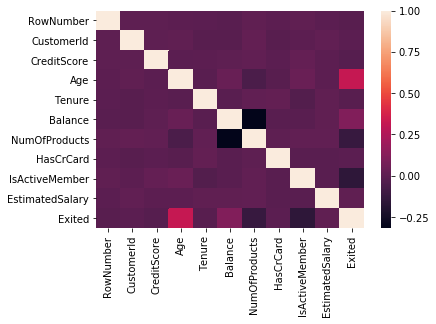

In [178]:
# Using seaborn for heatmap chart
corr = bank_df.corr(method='spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Again, I see only Age and Balance(slightly) are related to Customer's exit status!

Age and Balance variables are linearly related to Customer's exit status. Relationship with other variables is very weak. It's important to remember, correlation doesn't mean causation. 

### Null Hypothesis Testing

I will take my first question to conduct Null hypothesis test. 
The question I intend to ask was "What variables are related to Customer churn".
From the correlation analysis, we saw Age is related to Customer churn. 
So, **Do Female customers churn more than the Male customers?**

In order to prove that point, my *Null Hypothesis test* would be **Customers of any gender churn equally**.  

*Alternate hypothesis* would be **"Female customers churn differently than the Male customers"**

In [181]:
# A quick look at the count of Exited customers by Gender and Total count
bank_df.groupby('Gender')['Exited'].agg(['sum','count'])

,sum,count
Gender,,
Female,1139,4543
Male,898,5457


#### Test Statistic

In [218]:
# Defining Test Statics function
# Below Test Static basically computes the difference in total exited customers for given tuple of groups
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

In [219]:
group1 = bank_df[bank_df.Gender == 'Female'].Exited
group2 = bank_df[bank_df.Gender == 'Male'].Exited

In [220]:
actual = TestStatistic((group1, group2))
actual

0.08615610465201876

Actual = 8.6% , that means 8.6% more Female customers exited than Male customers in the given dataset.

Null hypothesis test:- There is no difference between these two groups.  
So, let's create one big group combining Female and Male customers.

In [221]:
n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))

Let's shuffle large group which is made up of two groups with length n and m.  
Use the large pool and randomly divide it into two groups of size n and m, and do the test static. 


In [222]:
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data
    

In [225]:
TestStatistic(RunModel())

0.011936073480412424

Above Test Stat is quite different than the actual value of 0.086. So, running just one time it looks like the difference is by chance. However, let's confirm it by calculating it a 1000 times.

Lets run the model 1000 times and capture the test stats.

In [227]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])
test_stats.shape

(1000,)

Let's plot the results of the test statistics on the chart

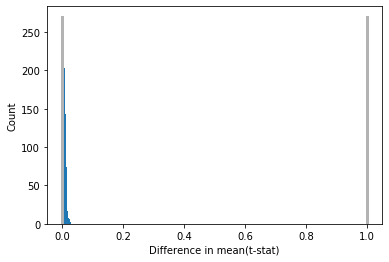

In [297]:
# Function to draw vertical line with actual Test static on the plot
def VertLine(x):
    """Draws a vertical line at x."""
    xs = [x, x]
    ys = [0, 270]
    plt.plot(xs, ys, linewidth=3, color='0.7')
VertLine(actual)

#Histogram for all test statistic values
plt.hist(test_stats)
plt.xlabel('Difference in mean(t-stat)')
plt.ylabel('Count')
plt.show()

Distribution past the actual value doesn't exist, so that means null hypothesis is not true.  
p-value is basically probability that the test statistic under the null hypothesis exceeds the actual value.

#### p-value

In [247]:
# p-value calculation
p_value = sum(test_stats>=actual)/len(test_stats)
p_value

0.0

#### Conclusion

Since the p-value is less than 1%, the null hypothesis is rejected.   
Our initial assumption of Female customers exited more than Male customers is actually true and is not by chance.

### Regression Analysis

### Linear Regression

Let's take the target variable "Exited" and explanatory variable as "Age" since we saw correrelation between these two.

In [251]:
# Statsmodels provide ols method (ordinary least squares) for linear regression
import statsmodels.formula.api as smf
formula = 'Exited ~ Age'
model = smf.ols(formula, data=bank_df)
results = model.fit()


In [254]:
# Intercept of the fit line
inter = results.params['Intercept']

# Slope of the fit line
slope = results.params['Age']
inter, slope

(-0.22278197445968762, 0.010957406246876755)

In [255]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     886.1
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          1.24e-186
Time:                        21:47:42   Log-Likelihood:                -4670.4
No. Observations:               10000   AIC:                             9345.
Df Residuals:                    9998   BIC:                             9359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2228      0.015    -15.014      0.000      -0.252      -0.194
Age            0.0110      0.000     29.767      0.000       0.010       0.012
==============================================================================
Omnibus:                     1669.435   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.513
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                       3.183   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above summary of the fit line, we can understand a few things:
    1. Intercept of the line is -0.2228
    2. Slope of the line is 0.0110 and its p-value is 0 which means it is statistically significant.
    3. R-squared value is 0.081. That means the this linear regression model can only explain 8.1% of the variation in the 
        data. 8.1% is not a lot of predictive power. The greater the R2, the better predictive power of the model would
        be.

In [261]:
formula = 'Exited ~ Age + Age**2 + Balance'
model = smf.ols(formula, data=bank_df)
results = model.fit()

In [262]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     516.3
Date:                Mon, 11 Nov 2019   Prob (F-statistic):          4.14e-214
Time:                        22:01:14   Log-Likelihood:                -4603.5
No. Observations:               10000   AIC:                             9213.
Df Residuals:                    9997   BIC:                             9235.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2727      0.015    -17.759      0.000      -0.303      -0.243
Age            0.0108      0.000     29.625      0.000       0.010       0.012
Balance     7.136e-07   6.15e-08     11.605      0.000    5.93e-07    8.34e-07
==============================================================================
Omnibus:                     1616.675   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2550.046
Skew:                           1.234   Prob(JB):                         0.00
Kurtosis:                       3.167   Cond. No.                     3.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above linear model explains the variation better than first model. However, it is more meaningful to build the model using Logistic regression since the target variable in binary.

### Logistic Regression

Let's use Logistic regression to model to predict Customer exit using Age variable. 

In [264]:
model = smf.logit('Exited ~ Age', data=bank_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.467553
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Nov 2019   Pseudo R-squ.:                 0.07505
Time:                        22:04:04   Log-Likelihood:                -4675.5
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                5.077e-167
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9286      0.103    -38.096      0.000      -4.131      -3.726
Age            0.0629      0.002     26.614      0.000       0.058       0.068
==============================================================================
"""

Interpretition:
    1. Age variable is statistically significant since p value is 0.
    2. Coefficient of Age variable is 0.0629 which means for every year increase in Age, Exit value's log odds would 
        increase by 6.29%.
    3. R-squared value is 0.07505 that means the model can only explain 7.5% of the overall variance of the data. That's not 
        a lot of predictive power.

I tried few other variables with logistic regression for this dataset. The below one has slighly better predictive power.  
So, this would be my final model.

In [274]:
# Using addional variable IsActiveMember in the model
model = smf.logit('Exited ~ Age + C(IsActiveMember)', data=bank_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.447609
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 Nov 2019   Pseudo R-squ.:                  0.1145
Time:                        23:01:51   Log-Likelihood:                -4476.1
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                4.283e-252
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.8429      0.106    -36.218      0.000      -4.051      -3.635
C(IsActiveMember)[T.1]    -1.0867      0.057    -19.231      0.000      -1.197      -0.976
Age                        0.0726      0.003     28.882      0.000       0.068       0.078
==========================================================================================
"""

Interpretition:
    1. Age and IsActiveMember variables are statistically significant since their p value is 0.
    2. Coefficient of Age variable is 0.0726 which means for every year increase in Age ,controlling for IsActiveMember, 
        Exit value's log odds would 
        increase by 7.26%.
    3. Coefficient of IsActiveMember variable is -1.0867 which means for every True value in isActiveMember, controlling 
        for Age, Exit value's log odds go down by -108%.
    3. R-squared value is 0.1145 that means the model can only explain 11.45% of the overall variance of the data. 
        That's not a lot of predictive power.

#### Accuracy of the model

In [291]:
# Lets create two dataframes. one for target variable and another for predictive variables
# Target variable
endog = pd.DataFrame(model.endog, columns=[model.endog_names])

#Predictive variables
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [292]:
# If you don't know anything about the model and 
# if you're asked to guess customer exit status then, you would guess it as the mean of the avaialble Exit statuses
# so, that's what I did below and called it as Baseline
actual = endog['Exited']
# Baseline 
baseline = actual.mean()
baseline

0.2037

So I would guess it as the customer has not exited since the baseline value is much less than 50%.

In [296]:
#I'm using the results from logistic model to predict accuracy 
predict = (results.predict() >= 0.5)

#True positives
true_pos = predict * actual

#True negatives
true_neg = (1 - predict) * (1 - actual)

#Accuracy
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.805

The accuracy of the logistic regression model is 80.5% which is much better than the baseline model.  
Finally, I reiterate the Logistic Regression model that I used :  
**logit('Exited ~ Age + C(IsActiveMember)'**

#### End of Project ###